## __OBJECTIVE OF ANALYSIS__

### _The major objective of the analysis is to visualize salaries based on different metrics like gender, experience, and education for the IT industry in United States of America from the Survey dataset._
***

## __RESEARCH QUESTION__

### Are male software engineers paid higher salaries than their female and non-binary counterparts ?

***

## __MOTIVATION FOR CHOOSING THIS DATASET__
## _This dataset consists of various types of inputs and inconsistent inputs that makes it ideal for data cleaning practice._
***

# IMPORTING NECESSARY LIBRARIES

In [28]:
import pandas as pd
import numpy as np
import difflib
import fuzzywuzzy
from fuzzywuzzy import process
import seaborn as sns
import matplotlib.pyplot as plt
import chardet
import openpyxl

# IMPORTING DATA (.csv)

In [2]:
# Loading raw data into pandas dataframe
raw_data = pd.DataFrame(pd.read_csv('data/survey.csv'))

# Viewing first 5 rows
raw_data.head(5)


,Timestamp,How old are you?,What industry do you work in?,Job title,"If your job title needs additional context, please clarify here:","What is your annual salary? (You'll indicate the currency in a later question. If you are part-time or hourly, please enter an annualized equivalent -- what you would earn if you worked the job 40 hours a week, 52 weeks a year.)","How much additional monetary compensation do you get, if any (for example, bonuses or overtime in an average year)? Please only include monetary compensation here, not the value of benefits.",Please indicate the currency,"If ""Other,"" please indicate the currency here:","If your income needs additional context, please provide it here:",What country do you work in?,"If you're in the U.S., what state do you work in?",What city do you work in?,How many years of professional work experience do you have overall?,How many years of professional work experience do you have in your field?,What is your highest level of education completed?,What is your gender?,What is your race? (Choose all that apply.)
0,4/27/2021 11:02:10,25-34,Education (Higher Education),Research and Instruction Librarian,NaN,"55,000",0.0,USD,NaN,NaN,United States,Massachusetts,Boston,5-7 years,5-7 years,Master's degree,Woman,White
1,4/27/2021 11:02:22,25-34,Computing or Tech,Change & Internal Communications Manager,NaN,"54,600",4000.0,GBP,NaN,NaN,United Kingdom,NaN,Cambridge,8 - 10 years,5-7 years,College degree,Non-binary,White
2,4/27/2021 11:02:38,25-34,"Accounting, Banking & Finance",Marketing Specialist,NaN,"34,000",NaN,USD,NaN,NaN,US,Tennessee,Chattanooga,2 - 4 years,2 - 4 years,College degree,Woman,White
3,4/27/2021 11:02:41,25-34,Nonprofits,Program Manager,NaN,"62,000",3000.0,USD,NaN,NaN,USA,Wisconsin,Milwaukee,8 - 10 years,5-7 years,College degree,Woman,White
4,4/27/2021 11:02:42,25-34,"Accounting, Banking & Finance",Accounting Manager,NaN,"60,000",7000.0,USD,NaN,NaN,US,South Carolina,Greenville,8 - 10 years,5-7 years,College degree,Woman,White


# CHECKING NUMBER OF ROWS AND COLUMNS IN THE DATASET

In [3]:
# Checking number of rows and columns
raw_data.shape

(27893, 18)

# CHANGING COLUMN HEADERS FOR SIMPLICITY

In [4]:
# Setting new column headers
new_column_headers = ['timestamp','age_group','curr_industry','job_title','job_context','curr_salary','compensation','currency','additional_currency','income_context','country','state_USA','city','overall_exp','field_exp','education','gender','race']
init_data = raw_data.set_axis(new_column_headers,axis=1,inplace=False)
init_data.head(5)

/var/folders/h2/3d9l8ncd5xdgj1h3ffmkqykw0000gn/T/ipykernel_84454/4246118180.py:3: FutureWarning: DataFrame.set_axis 'inplace' keyword is deprecated and will be removed in a future version. Use `obj = obj.set_axis(..., copy=False)` instead
  init_data = raw_data.set_axis(new_column_headers,axis=1,inplace=False)


,timestamp,age_group,curr_industry,job_title,job_context,curr_salary,compensation,currency,additional_currency,income_context,country,state_USA,city,overall_exp,field_exp,education,gender,race
0,4/27/2021 11:02:10,25-34,Education (Higher Education),Research and Instruction Librarian,NaN,"55,000",0.0,USD,NaN,NaN,United States,Massachusetts,Boston,5-7 years,5-7 years,Master's degree,Woman,White
1,4/27/2021 11:02:22,25-34,Computing or Tech,Change & Internal Communications Manager,NaN,"54,600",4000.0,GBP,NaN,NaN,United Kingdom,NaN,Cambridge,8 - 10 years,5-7 years,College degree,Non-binary,White
2,4/27/2021 11:02:38,25-34,"Accounting, Banking & Finance",Marketing Specialist,NaN,"34,000",NaN,USD,NaN,NaN,US,Tennessee,Chattanooga,2 - 4 years,2 - 4 years,College degree,Woman,White
3,4/27/2021 11:02:41,25-34,Nonprofits,Program Manager,NaN,"62,000",3000.0,USD,NaN,NaN,USA,Wisconsin,Milwaukee,8 - 10 years,5-7 years,College degree,Woman,White
4,4/27/2021 11:02:42,25-34,"Accounting, Banking & Finance",Accounting Manager,NaN,"60,000",7000.0,USD,NaN,NaN,US,South Carolina,Greenville,8 - 10 years,5-7 years,College degree,Woman,White


# REMOVING UNNECCESARY DATA
>> ####  The research questions are not influenced by attributes like Race, Timestamp, Additional Currencies, Cities. Therefore, they were removed from the final dataset. 

In [5]:
# Dropping unnecessary columns
init_data.drop(columns=["job_context","compensation","income_context","race","additional_currency","timestamp"], inplace=True)

In [6]:
# Converting curr_salary column to numeric data type
init_data['curr_salary'] = init_data['curr_salary'].str.replace(",","",regex=False)
init_data['curr_salary'] = pd.to_numeric(init_data['curr_salary'])

init_data

,age_group,curr_industry,job_title,curr_salary,currency,country,state_USA,city,overall_exp,field_exp,education,gender
0,25-34,Education (Higher Education),Research and Instruction Librarian,55000,USD,United States,Massachusetts,Boston,5-7 years,5-7 years,Master's degree,Woman
1,25-34,Computing or Tech,Change & Internal Communications Manager,54600,GBP,United Kingdom,NaN,Cambridge,8 - 10 years,5-7 years,College degree,Non-binary
2,25-34,"Accounting, Banking & Finance",Marketing Specialist,34000,USD,US,Tennessee,Chattanooga,2 - 4 years,2 - 4 years,College degree,Woman
3,25-34,Nonprofits,Program Manager,62000,USD,USA,Wisconsin,Milwaukee,8 - 10 years,5-7 years,College degree,Woman
4,25-34,"Accounting, Banking & Finance",Accounting Manager,60000,USD,US,South Carolina,Greenville,8 - 10 years,5-7 years,College degree,Woman
...,...,...,...,...,...,...,...,...,...,...,...,...
27888,25-34,Computing or Tech,Systems Engineer,114000,USD,US,Wisconsin,Verona,2 - 4 years,2 - 4 years,Master's degree,Woman
27889,18-24,Business or Consulting,Data Management Consultant,60000,GBP,United Kingdom,NaN,London,2 - 4 years,2 - 4 years,College degree,Woman
27890,35-44,Engineering or Manufacturing,Project Engineer,75000,USD,United States,Missouri,Kansas City,5-7 years,5-7 years,College degree,Woman
27891,18-24,Computing or Tech,Technology Associate,8600,EUR,Romania,NaN,Bucharest,1 year or less,1 year or less,College degree,Man


# CONSOLIDATING ALL COUNTRY COLUMN VALUES

In [7]:
# Count of unique values in country column
print(len(init_data.country.unique()))

368


In [8]:
# The script below removes whitespaces from the values in the country columns, changes them to lowercase and replaces matched country names with thos in the countries_list list

countries_list = ['us', 'statesofamerica', 'america', 'usa', 'unitedstates']


init_data['country'] = init_data['country'].str.lower()
init_data['country'] = init_data['country'].str.replace('\W', '')
init_data['state_USA'] = init_data['state_USA'].replace(np.nan,'N/A')

# checking values for every column to get top match with 70% match rate
for i in init_data.index:
    country = init_data.at[i,"country"]
    matched_country = difflib.get_close_matches(country,countries_list,n=1,cutoff=0.85)
    
    if matched_country:
        init_data.at[i,'country'] = matched_country[0]

# converting values of matched countries to 'us'
for i in init_data.index:
    if init_data.at[i,"country"] in countries_list:
        init_data.at[i,"country"] = 'us'

/var/folders/h2/3d9l8ncd5xdgj1h3ffmkqykw0000gn/T/ipykernel_84454/1979729213.py:7: FutureWarning: The default value of regex will change from True to False in a future version.
  init_data['country'] = init_data['country'].str.replace('\W', '')


In [9]:
# Checking the unique values in the country column to verify
print(len(init_data.country.unique()))



203


# CONSOLIDATING GENDER COLUMN

In [10]:
# Checking NaNs in the column
print(init_data["gender"].isna().sum())

# Checking unique values for gender column
print(init_data["gender"].unique())

165
['Woman' 'Non-binary' 'Man' nan 'Other or prefer not to answer'
 'Prefer not to answer']


In [11]:
# Setting Man, Woman, and Non-Binary to M,F,NB respectively
init_data.loc[(init_data['gender']=='Man'), 'gender'] = 'M'
init_data.loc[(init_data['gender']=='Woman'), 'gender'] = 'F'
init_data.loc[(init_data['gender']=='Non-binary'), 'gender'] = 'NB'

# Setting "Other or prefer not to answer" to Other as the value "Prefer not to answer" already exists.
# Survey participants can identify as other genders that were not part of the questionnaire
init_data.loc[(init_data['gender']=='Other or prefer not to answer'), 'gender'] = 'Other'

# Setting NaN to No Answer
init_data["gender"].fillna("No Answer", inplace=True)

# Checking NaNs in the column
print(init_data["gender"].isna().sum())

0


# CONSOLIDATING VALUES FOR CURRENT INDUSTRY

In [12]:
print(len(init_data["curr_industry"].unique()))
print(init_data["curr_industry"].isna().sum())
# Dropping NaN values
init_data.dropna(inplace=True)
print(init_data["curr_industry"].isna().sum())

1210
71
0


### APPLYING FUZZY MATCHING TO BRING VALUES LIKE ["Software" , "Programming", "Computing"] into IT. 

In [13]:
# removing trailing whitespaces 
init_data["curr_industry"] = init_data["curr_industry"].str.strip()

# chanign to lowercase
init_data["curr_industry"] = init_data["curr_industry"].str.lower()


# Making function for fuzzy matching
def fuzzy_match(df, col, text_to_match, text_to_replace, ratio, lim=10):

    # Getting unique values from input column
    unique_ind = df[col].unique()

    # Running fuzzy matching algorithm from fuzzywuzzy library
    matched_ind = fuzzywuzzy.process.extract(text_to_match,unique_ind, limit=lim, scorer=fuzzywuzzy.fuzz.token_sort_ratio)

    # If the similarity ratio is less than the given ratio
    if matched_ind[0][1] < ratio:
        print(f"Ratio given is too high. Try less than or equal to {matched_ind[0][1]}")
    else: 
        # Create an array for best matches
        best_match = [match[0] for match in matched_ind if match[1]>=ratio]
        i = 0
        print("Matches returned :")
        # Print matches to see if the output is correct
        while best_match!=[] and i<len(best_match):
            print(best_match[i])
            i+=1
        # Giving user an option to proceed or abort the matching
        ch = input("Check matches and press 'Y' to change (press and other key to abort) : ")

        # Proceeding with replacement if selection is "y"
        if ch.lower()=="y":

            # creating another column that returns boolean values for matches
            to_replace = df[col].isin(best_match)

            # replacing where boolean values are True
            df.loc[(to_replace,col)] = text_to_replace
            print(f"Replaced {text_to_match} instances in {col} column with {text_to_replace} | unique values are : {len(df[col].unique())}")
    return 


    
    
fuzzy_match(init_data, "curr_industry" ,"computing software", "IT", 59)



Matches returned :
computing or tech
software/programming
saas company/software
strategy consulting
software development / it
software development
software products
software
payroll software
biotech/software
Replaced computing software instances in curr_industry column with IT | unique values are : 983


### Validating results

In [14]:
init_data.head(10)


,age_group,curr_industry,job_title,curr_salary,currency,country,state_USA,city,overall_exp,field_exp,education,gender
0,25-34,education (higher education),Research and Instruction Librarian,55000,USD,us,Massachusetts,Boston,5-7 years,5-7 years,Master's degree,F
1,25-34,IT,Change & Internal Communications Manager,54600,GBP,unitedkingdom,N/A,Cambridge,8 - 10 years,5-7 years,College degree,NB
2,25-34,"accounting, banking & finance",Marketing Specialist,34000,USD,us,Tennessee,Chattanooga,2 - 4 years,2 - 4 years,College degree,F
3,25-34,nonprofits,Program Manager,62000,USD,us,Wisconsin,Milwaukee,8 - 10 years,5-7 years,College degree,F
4,25-34,"accounting, banking & finance",Accounting Manager,60000,USD,us,South Carolina,Greenville,8 - 10 years,5-7 years,College degree,F
5,25-34,education (higher education),Scholarly Publishing Librarian,62000,USD,us,New Hampshire,Hanover,8 - 10 years,2 - 4 years,Master's degree,M
6,25-34,publishing,Publishing Assistant,33000,USD,us,South Carolina,Columbia,2 - 4 years,2 - 4 years,College degree,F
7,25-34,education (primary/secondary),Librarian,50000,USD,us,Arizona,Yuma,5-7 years,5-7 years,Master's degree,M
8,45-54,IT,Systems Analyst,112000,USD,us,Missouri,St. Louis,21 - 30 years,21 - 30 years,College degree,F
9,35-44,"accounting, banking & finance",Senior Accountant,45000,USD,us,Florida,Palm Coast,21 - 30 years,21 - 30 years,College degree,F


# Modifying dataset so that all values are for United States for the IT industry

In [15]:
us_dataset = init_data.loc[(init_data['country']== 'us') & (init_data['curr_industry']== 'IT')]

# Dropping cities as it is not relevant to research questions
us_dataset = us_dataset.drop('city',axis=1)

In [16]:
# Resetting index
us_dataset = us_dataset.reset_index(drop=True)


In [39]:
# Sorting values
us_dataset.sort_values(by=['curr_salary'], inplace=True)
us_dataset.head(10)

,age_group,curr_industry,job_title,curr_salary,currency,country,state_USA,overall_exp,field_exp,education,gender
1628,18-24,IT,Product Marketer,0,USD,us,California,1 year or less,1 year or less,College degree,M
2595,45-54,IT,Founder,0,USD,us,California,21 - 30 years,21 - 30 years,Some college,F
852,35-44,IT,Software Development Lead,1,USD,us,Wisconsin,8 - 10 years,8 - 10 years,Master's degree,M
1201,45-54,IT,Account Manager,55,USD,us,New Hampshire,21 - 30 years,8 - 10 years,College degree,F
2180,25-34,IT,Technical Writer,72,USD,us,Washington,8 - 10 years,2 - 4 years,College degree,F
2264,45-54,IT,Coach,130,USD,us,N/A,11 - 20 years,11 - 20 years,Some college,NB
1730,25-34,IT,Chief Data Scientist,240,USD,us,California,5-7 years,5-7 years,PhD,M
1038,25-34,IT,Sr Consultant,10000,USD,us,District of Columbia,8 - 10 years,8 - 10 years,Master's degree,F
3546,35-44,IT,Software Engineer Technical Support,10700,USD,us,Texas,8 - 10 years,8 - 10 years,College degree,M
819,35-44,IT,Manager of Customer Support,13000,USD,us,California,11 - 20 years,11 - 20 years,Some college,F


In [43]:
# Converting Job titles to lower case
us_dataset['job_title'] = us_dataset['job_title'].str.lower()

In [55]:
#software engineer dataset

# The line of code below extracts all job title swith 'software engineer' 
# in the string and leaves out all job titles with senior, lead, principle, or support

se_ds = us_dataset.loc[(us_dataset['job_title'].str.contains('software engineer') & (~us_dataset['job_title'].str.contains('senior|lead|principle|support|principal')))]

In [56]:
se_ds

,age_group,curr_industry,job_title,curr_salary,currency,country,state_USA,overall_exp,field_exp,education,gender
1990,25-34,IT,associate software engineer,57000,USD,us,Indiana,5-7 years,1 year or less,College degree,M
167,25-34,IT,software engineer,60000,USD,us,California,5-7 years,2 - 4 years,College degree,F
649,18-24,IT,software engineer in test,60000,USD,us,New York,1 year or less,1 year or less,College degree,F
2731,25-34,IT,software engineer,61000,USD,us,California,5-7 years,1 year or less,College degree,F
1690,35-44,IT,developer (software engineer/programmer),63500,USD,us,Missouri,11 - 20 years,2 - 4 years,Some college,M
...,...,...,...,...,...,...,...,...,...,...,...
3561,25-34,IT,software engineer,340000,USD,us,"Michigan, Texas, Washington",2 - 4 years,2 - 4 years,Master's degree,M
2738,25-34,IT,software engineer,350000,USD,us,California,2 - 4 years,2 - 4 years,College degree,F
3014,25-34,IT,software engineer,400000,USD,us,Massachusetts,5-7 years,5-7 years,PhD,M
3551,25-34,IT,software engineer,590000,USD,us,New York,8 - 10 years,8 - 10 years,College degree,F


# Searching for outliers

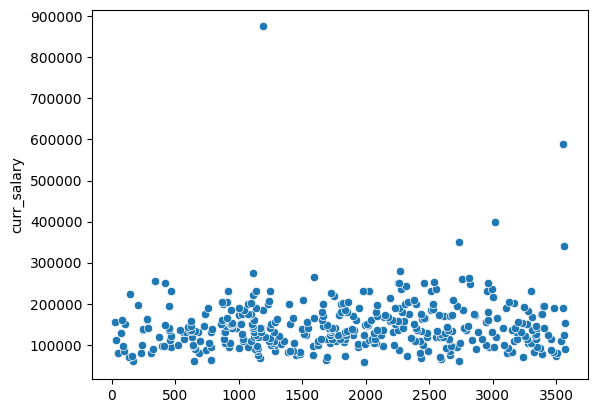

In [58]:
# Creating scatter plot for outliers
sns.scatterplot(y=se_ds['curr_salary'],x=se_ds.index)
plt.show()

### Most of the vlaues are concentrated around 100,000 and around 250,000


In [60]:
# Removing outliers from the dataset using Inter-Quartile Range (IQR)
# IQR depicts the spread of values in the current salary column

qt_1, qt_3 = np.percentile(se_ds['curr_salary'],[25,75])
iqr = qt_3-qt_1
lower_bound = qt_1 - (1.5 * iqr)
upper_bound = qt_3 + (1.5 * iqr)


print(lower_bound, upper_bound)

se_ds = se_ds.loc[(se_ds['curr_salary'] > lower_bound) & (se_ds['curr_salary'] < upper_bound)]

16250.0 266250.0


In [64]:
# resetting index
se_ds = se_ds.reset_index(drop=True)

In [65]:
# Describing dataset
se_ds.describe()

,curr_salary
count,399.000000
mean,140925.408521
std,45374.261953
min,57000.000000
25%,107725.000000
50%,135000.000000
75%,170200.000000
max,265000.000000


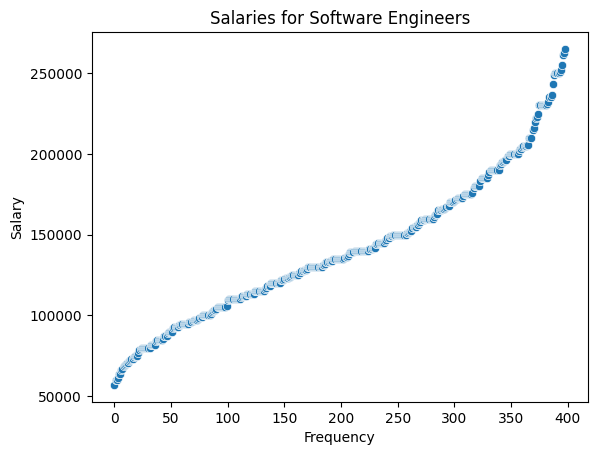

In [69]:
sns.scatterplot(y=se_ds['curr_salary'],x=se_ds.index)
plt.title("Salaries for Software Engineers")
plt.xlabel('Frequency')
plt.ylabel('Salary')
plt.show()

In [71]:
# Exporting to Excel for Visualization in Power BI

filename = 'se_dataset.xlsx'
se_ds.to_excel(filename)